## PAW wavelet decomposition

In [44]:
prefix = '/home/ines/repositories/'
prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [45]:
""" 
IMPORTS
"""
import os
# os.environ["JAX_PLATFORM_NAME"] = "cpu"
import numpy as np
import pandas as pd
from one.api import ONE
from matplotlib import pyplot as plt
from scipy import stats

# Get my functions
from functions import idxs_from_files, fast_wavelet_morlet_convolution_parallel, get_speed
one = ONE(mode='remote')

In [46]:
""" 
LOAD DATA AND PARAMETERS
"""
# LOAD DATA

data_path = prefix + 'representation_learning_variability/paper-individuality/data/design_matrices/kcenia/'
# data_path = prefix + 'representation_learning_variability/paper-individuality/data/temp/'

results_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_wavelets/kcenia/'
all_files = os.listdir(data_path)
design_matrices = [item for item in all_files if 'design_matrix' in item and 'standardized' not in item]
idxs, mouse_names = idxs_from_files(design_matrices)

# Wavelet decomposition
f = np.array([.25, .5, 1, 2, 4, 8, 16, 32])
omega0 = 5
velocity = True

In [47]:
# Loop through animals
files = os.listdir(results_path)
sessions_to_process = []

for m, mat in enumerate(idxs):
    mouse_name = mat[37:]
    session = mat[:36]

    """ SAVE DATA """       
    # Save wavelets
    if velocity:
        subname = "paw_vel_wavelets_"
    else:
        subname = "paw_pos_wavelets_"
    filename = subname + str(session) + '_'  + mouse_name

    if filename not in files:
        sessions_to_process.append((session))

len(sessions_to_process)

37

# Paw wavelets

In [48]:
concatenated_subsampled = np.array([])
paws = ['l_paw', 'r_paw']

for m, mat in enumerate(sessions_to_process):

    file_path = one.eid2path(mat)
    if prefix == '/home/ines/repositories/':
        mouse_name = file_path.parts[8]
    else:
        mouse_name = file_path.parts[7]

    session = mat
    filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)
    
    if velocity:
        left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 30, split=True, feature='l_paw')
        right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 30, split=True, feature='r_paw')
        
    for v, var in enumerate(paws):
        for c, coor in enumerate(['_x', '_y']):
            if velocity:
                # If velocity, no z-score before wavelets
                array = np.array(left_speeds[c+1]) if var=='l_paw' else np.array(right_speeds[c+1])
            else:
                # If position, z-score before wavelets
                design_matrix[var+coor] = stats.zscore(np.array(design_matrix[var+coor]), 
                                                    nan_policy='omit', axis=0)  #stats.zscore(data_df[paw_vars], axis=0)
                array = np.array(design_matrix[var+coor]) 
            not_nan = ~np.isnan(array)
            clean_array = array[not_nan]# np.array(stats.zscore(design_matrix[var][not_nan_x]))
            
            # Wavelet decomposition of paw position
            dt = np.round(np.mean(np.diff(design_matrix['Bin'])), 3)
            amp, Q, x_hat = fast_wavelet_morlet_convolution_parallel(clean_array, f, omega0, dt)

            # Wavelet transforms
            for i, frequency in enumerate(f):
                # Create new column with frequency
                design_matrix[str(var+coor+str(frequency))] = np.nan
                design_matrix[str(var+coor+str(frequency))][not_nan] = amp[i, :]

    """ SAVE DATA """       
    # Save wavelets
    if velocity:
        subname = "paw_vel_wavelets_"
    else:
        subname = "paw_pos_wavelets_"
    filename = results_path + subname + str(session) + '_'  + mouse_name
    design_matrix.to_parquet(filename, compression='gzip')  
    print(mat)

/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

a06c142a-9b90-4639-a66e-0ed464eeb476


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

f9b1dafa-1ec0-46e2-a72c-987535b72bb6


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

364d72f6-483c-4146-88df-e77e86f22a60


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

1f959c77-862c-4da1-a454-74a6e99ff33e


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

0de78321-9dce-4964-af4b-d0f00a41c647


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

69544b1b-7788-4b41-8cad-2d56d5958526


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

f0cfd8b5-4568-4944-96c9-23d75aed659c


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

b27c0221-781d-4519-bd14-9a03938edc12


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

d8b48595-6aa5-4e4b-b457-13b1b936248c


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

5853e474-2c8f-448f-8ef8-c753eaceb408


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

89b8ef70-e620-49c2-a0f7-09890ba9fc0e


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

72a5e765-efaf-49a5-831b-3cc35ec76517


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

163fa79b-9b33-43ee-8d58-335f4c12d370


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

604dc7eb-533f-4d32-a1a3-064f7144656e


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

3bef683f-46a4-4b98-8b53-8eb0d5bdf82b


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

a3657685-f782-41e6-bc94-2fb1061b1fec


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

291e25f7-b35f-4d11-815f-1429127059d4


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

bd5dbb12-dbfd-488c-b5d9-2b06bed078dd


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

d3b1eae9-7b19-4d09-9560-23092cce572c


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

acdb349a-0181-4455-82c1-2cbdc24ca362


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

d78d8da7-980d-4550-a039-8217abe51d9a


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

89a9b132-7cda-4d97-8d28-448119c0910e


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

fa9efd38-29f9-41a6-a005-21c9fc4be5dc


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

8c2639e9-ad67-4c07-bdc0-4a5ba994375c


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

d7bf2611-00bc-42d3-95c6-ac120753cd94


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

f2343157-4824-4fa2-84c1-a8bfebe21a8f


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

9ea8fa32-3cbf-4ea1-a341-285837caa137


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

475d6c49-1e0f-49db-b591-645c3283926e


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

12f1d635-8a2a-49fe-ad4d-efa33b89301b


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

e505245e-585c-451e-b590-60f3ef714a89


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

e69221c7-b533-42dc-8631-000279a45a70


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

404d1b7e-f6f2-4122-bd2d-9caa6a0e7777


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

04482c20-f984-4d90-97d6-6791bae1e6f7


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

e470c52d-25bc-4dac-9679-2dc0b7a3677f


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

f5369fa4-4bc2-4c65-9217-bea27df0f9ca


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

dd549116-68a1-462d-90ef-f4e0ec5c69fc


/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/paper-individuality/0_pre-processing/1_camera_setup/functions.py:649: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[i, :] = q
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3624505733.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveat

941df82c-9894-4280-bf3c-09323658b299


In [49]:
use_data = design_matrix.loc[(design_matrix['Bin']> 200) & (design_matrix['Bin']< 500)]

In [50]:
import seaborn as sns
palette = sns.color_palette('Greys')

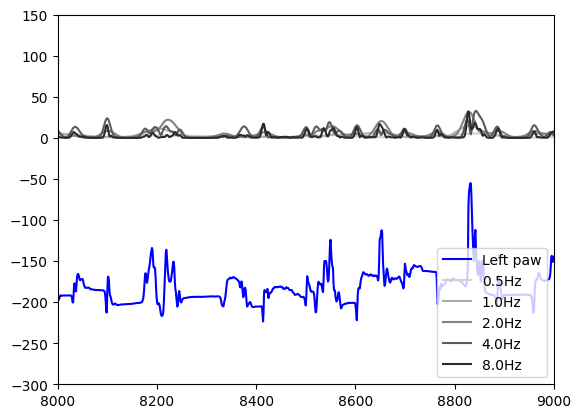

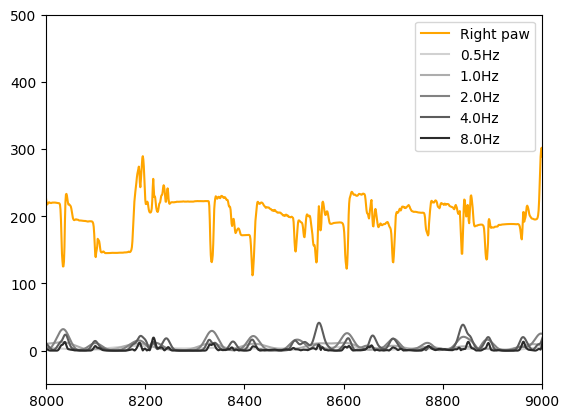

In [51]:
plt.plot(use_data['l_paw_x']/2-400, label='Left paw', color='Blue')
for i, e in enumerate(['l_paw_x0.5','l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0']):
    plt.plot(use_data[e]/2, label=e[-3:]+'Hz', color=palette[i+1])
    plt.legend()
    plt.xlim([8000, 9000])
    plt.ylim([-300, 150])
plt.show()
    
plt.plot(use_data['r_paw_x']-100, label='Right paw', color='Orange')
for i, e in enumerate(['r_paw_x0.5','r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0']):
    plt.plot(use_data[e], label=e[-3:]+'Hz', color=palette[i+1])
    plt.legend()
    plt.xlim([8000, 9000])
    plt.ylim([-50, 500])



(array([1.40000e+01, 5.10000e+01, 3.16000e+02, 3.10000e+03, 1.07045e+05,
        8.20900e+03, 5.23000e+02, 4.80000e+01, 6.00000e+00, 2.00000e+00]),
 array([-2299.88421548, -1804.6839195 , -1309.48362352,  -814.28332753,
         -319.08303155,   176.11726443,   671.31756042,  1166.5178564 ,
         1661.71815238,  2156.91844837,  2652.11874435]),
 <BarContainer object of 10 artists>)

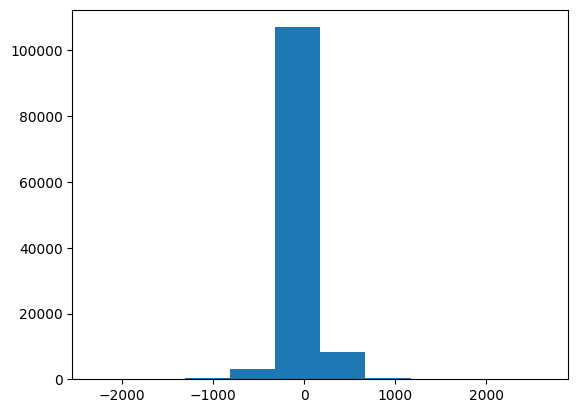

In [52]:
plt.hist(left_speeds[1])

## Data exploration

In [53]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/2472866129.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


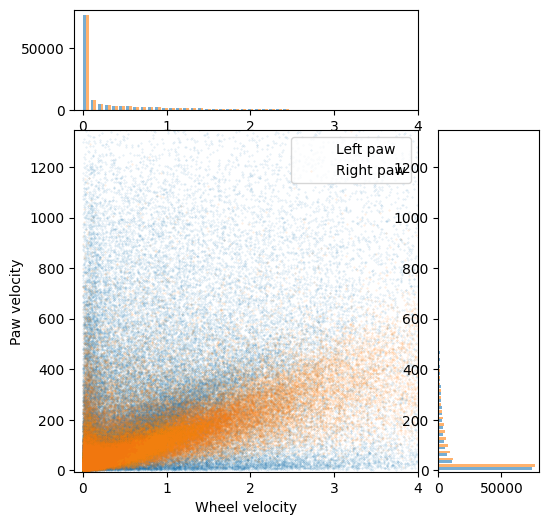

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/2472866129.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


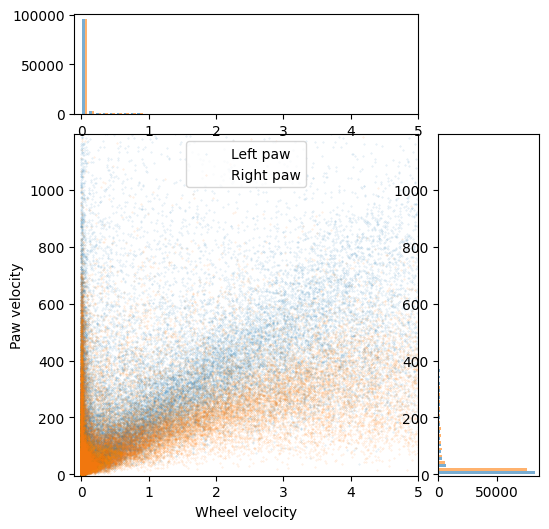

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/2472866129.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


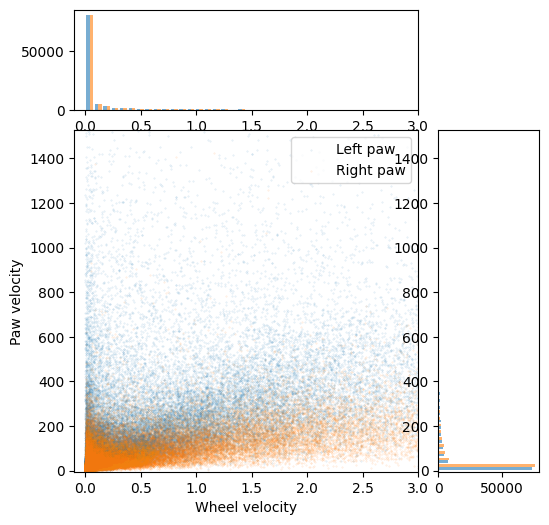

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/2472866129.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


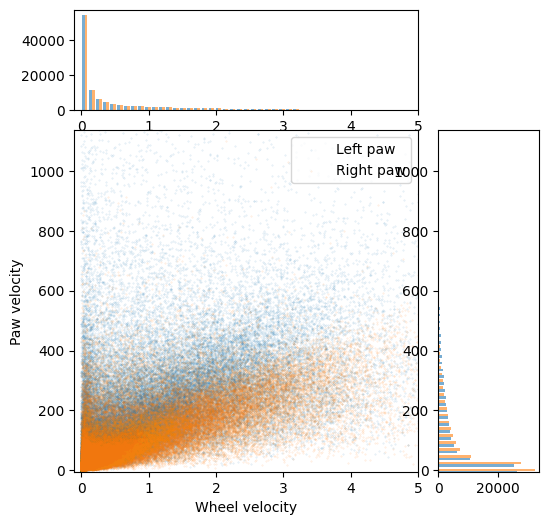

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/2472866129.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [54]:
paws = ['l_paw', 'r_paw']

for m, mat in enumerate(sessions_to_process[10:]):

    file_path = one.eid2path(mat)
    if prefix == '/home/ines/repositories/':
        mouse_name = file_path.parts[8]
    else:
        mouse_name = file_path.parts[7]

    session = mat
    filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)
    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 30, split=False, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 30, split=False, feature='r_paw')
    
    # Create main figure
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

    # Define areas
    main_ax = fig.add_subplot(grid[1:4, 0:3])
    x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
    y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)

    # Scatterplot (two hues)
    main_ax.scatter(np.abs(design_matrix['avg_wheel_vel']), left_speeds[1], alpha=0.2, s=.1, label='Left paw', color='C0')
    main_ax.scatter(np.abs(design_matrix['avg_wheel_vel']), right_speeds[1], alpha=0.2, s=.1, label='Right paw', color='C1')
    main_ax.legend()
    
    # --- Fit and plot regression lines ---
    x1 = x2 = np.array(np.abs(design_matrix['avg_wheel_vel']))
    y1 = left_speeds[1]
    y2 = right_speeds[1]
    
    # # Fit and plot for each group
    # model = LinearRegression()
    # for x, y, color, label in [(x1, y1, 'C0', 'Group 1'), (x2, y2, 'C1', 'Group 2')]:
    #     model.fit(x.reshape(-1, 1), y)
    #     xs = np.linspace(x.min(), x.max(), 100)
    #     ys = model.predict(xs.reshape(-1, 1))
    #     plt.plot(xs, ys, color=color, linewidth=2)


    main_ax.legend()


    # Marginal histograms
    y_hist.hist([left_speeds[1],right_speeds[1]], bins=100, color=['C0', 'C1'], alpha=0.6, orientation='horizontal')
    x_hist.hist([np.abs(design_matrix['avg_wheel_vel']), np.abs(design_matrix['avg_wheel_vel'])], bins=100, color=['C0', 'C1'], alpha=0.6)

    # Hide tick labels on shared axes
    # x_hist.set_xticks([])
    # y_hist.set_yticks([])
    main_ax.set_ylim([-5, int(np.nanmax([left_speeds[1], right_speeds[1]])/2)])
    main_ax.set_xlim([-.1, int(np.nanmax(np.abs(design_matrix['avg_wheel_vel']))/2)])
    main_ax.set_xlabel('Wheel velocity')
    main_ax.set_ylabel('Paw velocity')
    plt.tight_layout()
    plt.show()

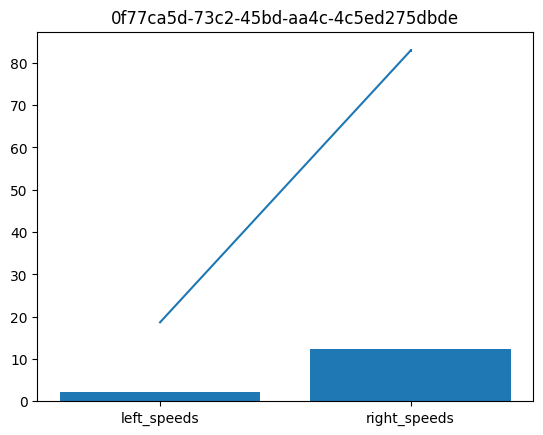

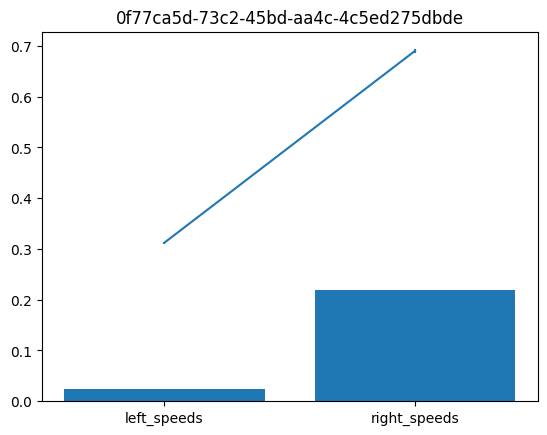

0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde


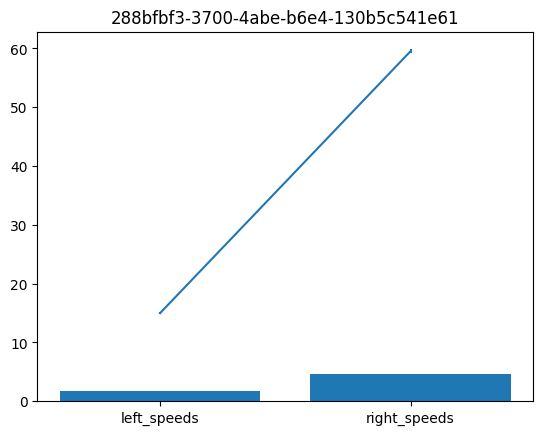

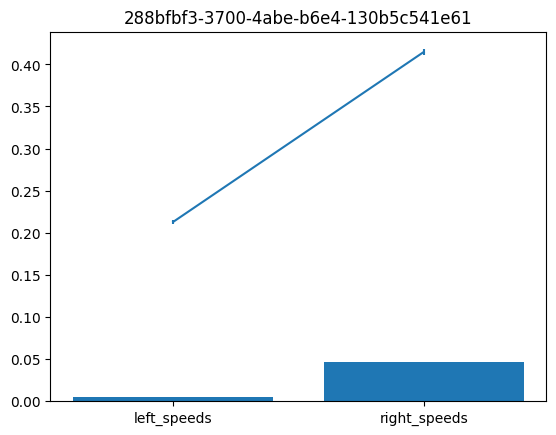

288bfbf3-3700-4abe-b6e4-130b5c541e61


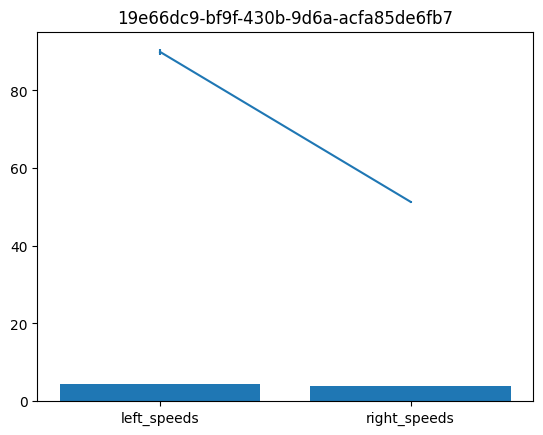

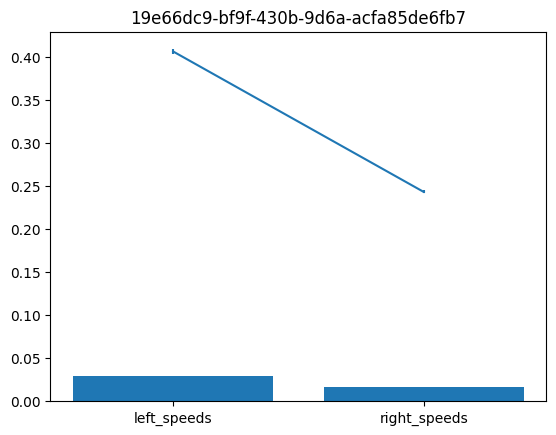

19e66dc9-bf9f-430b-9d6a-acfa85de6fb7


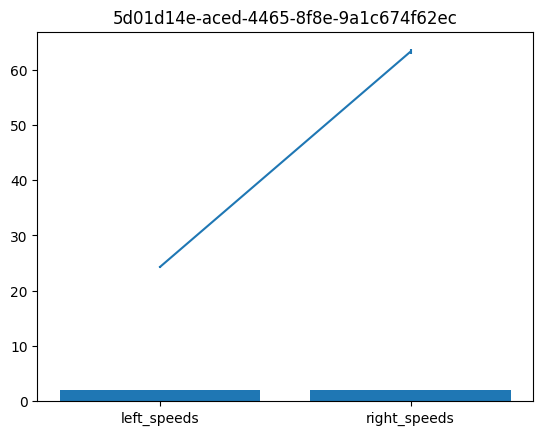

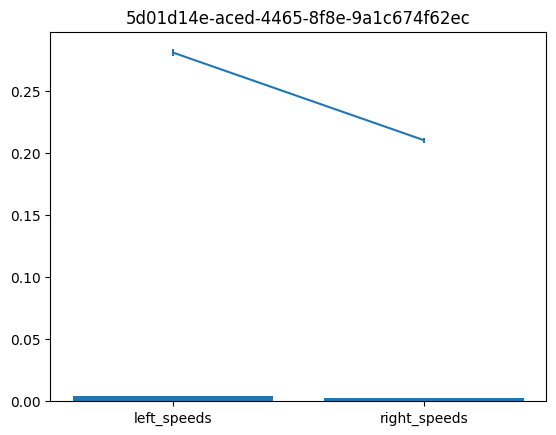

5d01d14e-aced-4465-8f8e-9a1c674f62ec


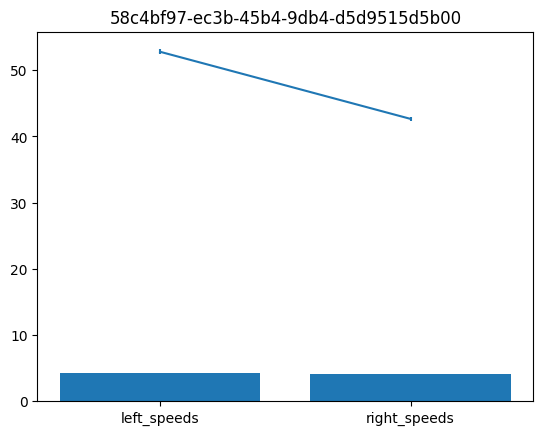

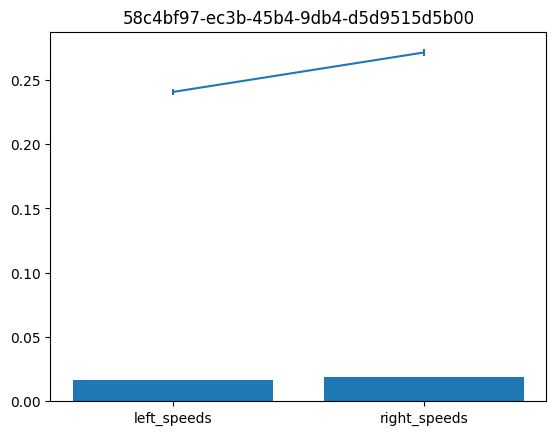

58c4bf97-ec3b-45b4-9db4-d5d9515d5b00


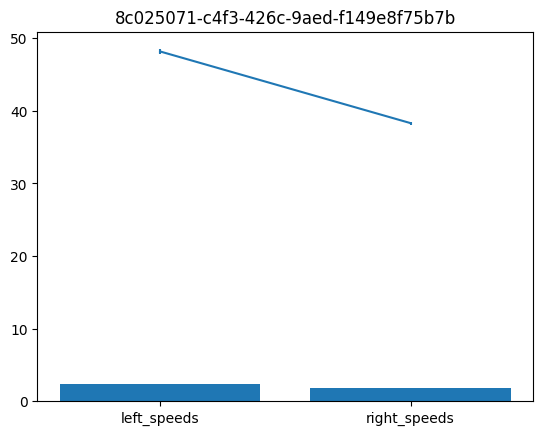

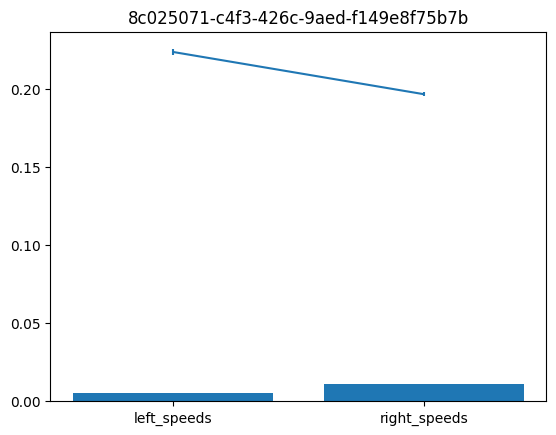

8c025071-c4f3-426c-9aed-f149e8f75b7b


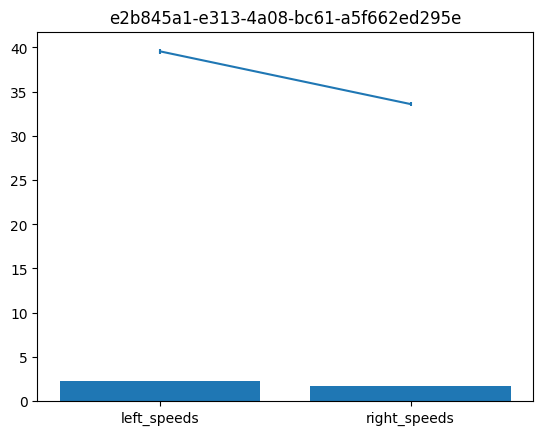

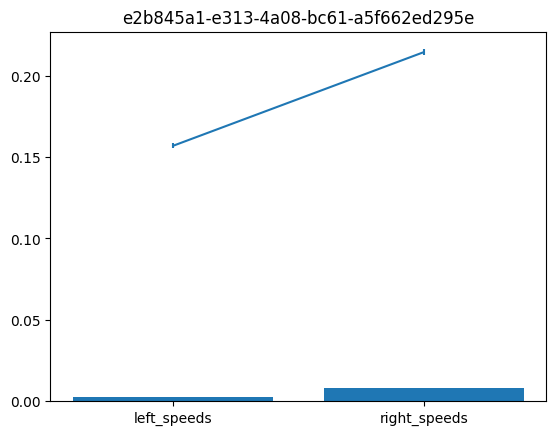

e2b845a1-e313-4a08-bc61-a5f662ed295e


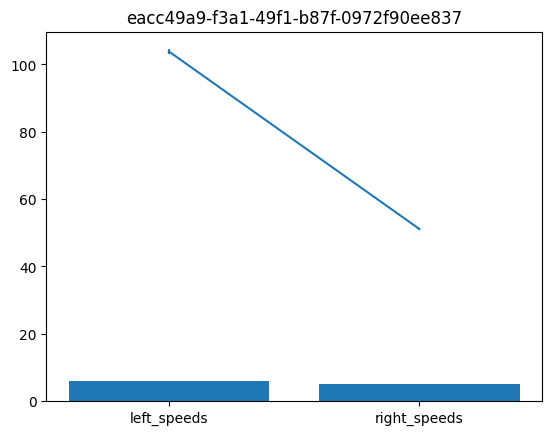

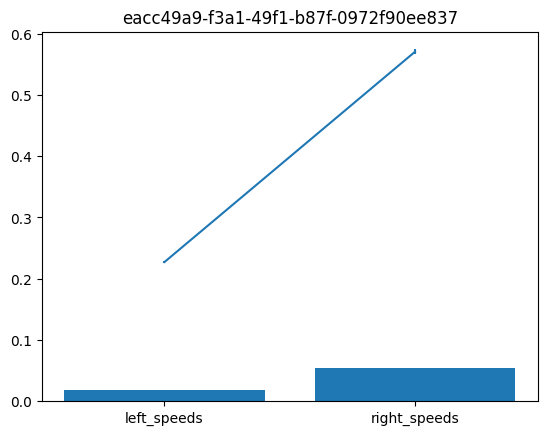

eacc49a9-f3a1-49f1-b87f-0972f90ee837


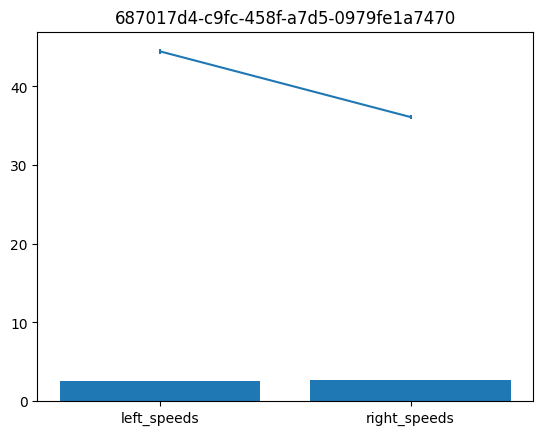

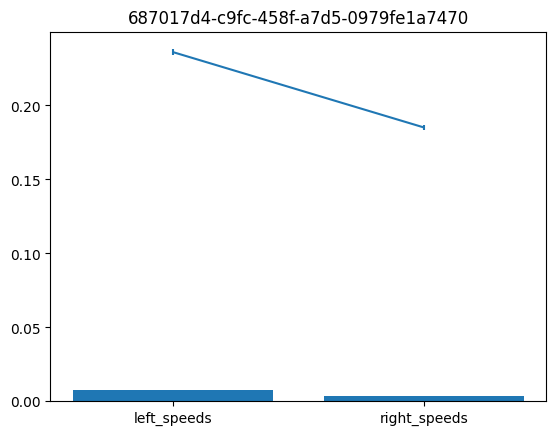

687017d4-c9fc-458f-a7d5-0979fe1a7470


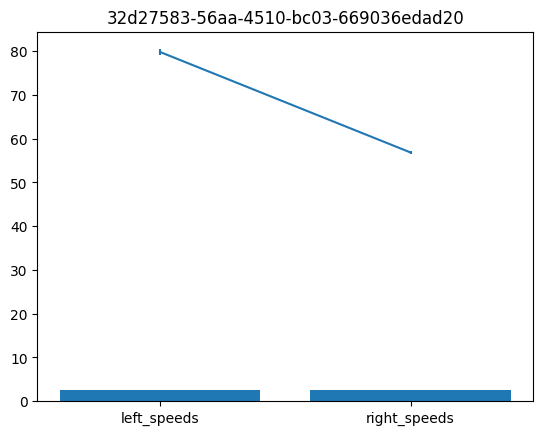

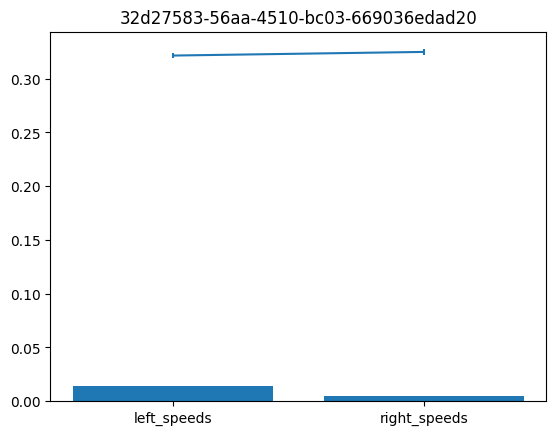

32d27583-56aa-4510-bc03-669036edad20


In [35]:
paws = ['l_paw', 'r_paw']

for m, mat in enumerate(sessions_to_process[:10]):

    file_path = one.eid2path(mat)
    if prefix == '/home/ines/repositories/':
        mouse_name = file_path.parts[8]
    else:
        mouse_name = file_path.parts[7]

    session = mat
    filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)
    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 30, split=True, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 30, split=True, feature='r_paw')
    
    plt.bar(['left_speeds', 'right_speeds'],
            [np.nanmedian(np.abs(left_speeds[1])), np.nanmedian(np.abs(right_speeds[1]))])
    plt.errorbar(['left_speeds', 'right_speeds'],
            [np.nanmean(np.abs(left_speeds[1])), np.nanmean(np.abs(right_speeds[1]))],
            [np.nanstd(np.abs(left_speeds[1]))/np.sqrt(len(left_speeds[1])), np.nanstd(np.abs(right_speeds[1]))/np.sqrt(len(right_speeds[1]))])
    plt.title(mat)
    plt.show()
    plt.bar(['left_speeds', 'right_speeds'],
            [np.median(np.abs(design_matrix.loc[design_matrix['avg_wheel_vel']<0, 'avg_wheel_vel'])), 
             np.median(np.abs(design_matrix.loc[design_matrix['avg_wheel_vel']>0, 'avg_wheel_vel']))])
    plt.errorbar(['left_speeds', 'right_speeds'],
                 [np.mean(np.abs(design_matrix.loc[design_matrix['avg_wheel_vel']<0, 'avg_wheel_vel'])), 
                np.mean(np.abs(design_matrix.loc[design_matrix['avg_wheel_vel']>0, 'avg_wheel_vel']))], 
                 [np.nanstd(np.abs(design_matrix.loc[design_matrix['avg_wheel_vel']<0, 'avg_wheel_vel']))/np.sqrt(len(design_matrix.loc[design_matrix['avg_wheel_vel']<0, 'avg_wheel_vel'])), 
              np.nanstd(np.abs(design_matrix.loc[design_matrix['avg_wheel_vel']>0, 'avg_wheel_vel']))/np.sqrt(len(design_matrix.loc[design_matrix['avg_wheel_vel']>0, 'avg_wheel_vel']))])
    plt.title(mat)
    plt.show()
    print(mat)
        

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/91921355.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1, 1].legend()
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/91921355.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


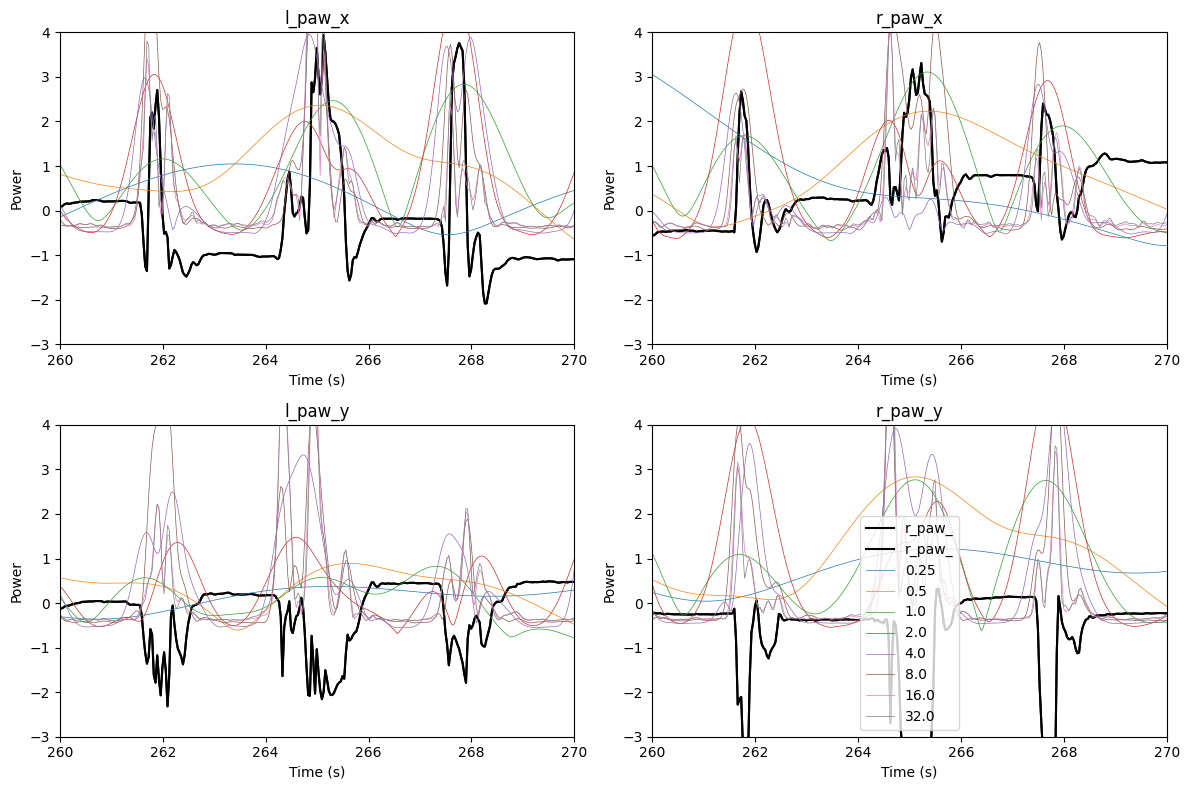

In [32]:
init = 260
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
for v, var in enumerate(['l_paw_', 'r_paw_']):
    for c, coor in enumerate(['x', 'y']):
        ax[c, v].plot(design_matrix['Bin'], stats.zscore(design_matrix[var+coor], nan_policy='omit'), label=var, color='k')
        ax[c, v].plot(design_matrix['Bin'], stats.zscore(design_matrix[var+coor], nan_policy='omit'), label=var, color='k')
        # Wavelet transforms
        for i, frequency in enumerate(f):
            ax[c, v].plot(design_matrix['Bin'], stats.zscore(design_matrix[var+coor+str(frequency)], 
                                                             nan_policy='omit'), label=str(frequency), linewidth=.5)
            ax[c, v].set_xlim([init, init+10])
            ax[c, v].set_ylim([-3, 4])
            ax[c, v].set_ylabel('Power')
            ax[c, v].set_xlabel('Time (s)')
        ax[c, v].set_title(var+coor)
    ax[1, 1].legend()
    plt.tight_layout()

/tmp/ipykernel_12118/4288006091.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1, 1].legend()


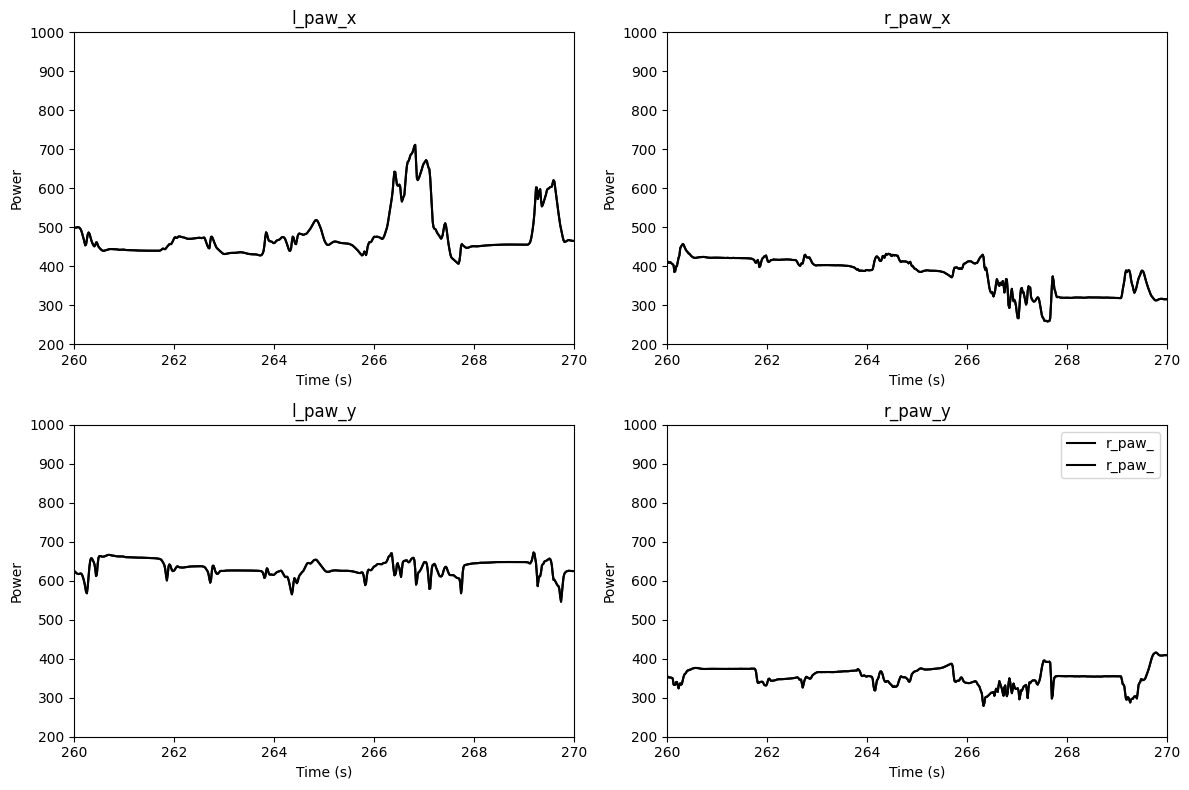

In [136]:
init = 260
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
for v, var in enumerate(['l_paw_', 'r_paw_']):
    for c, coor in enumerate(['x', 'y']):
        ax[c, v].plot(design_matrix['Bin'], design_matrix[var+coor], label=var, color='k')
        ax[c, v].plot(design_matrix['Bin'], design_matrix[var+coor], label=var, color='k')

        ax[c, v].set_xlim([init, init+10])
        ax[c, v].set_ylim([200, 1000])
        ax[c, v].set_ylabel('Power')
        ax[c, v].set_xlabel('Time (s)')
        ax[c, v].set_title(var+coor)
    ax[1, 1].legend()
    plt.tight_layout()

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45103/3896101047.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1, 1].legend()


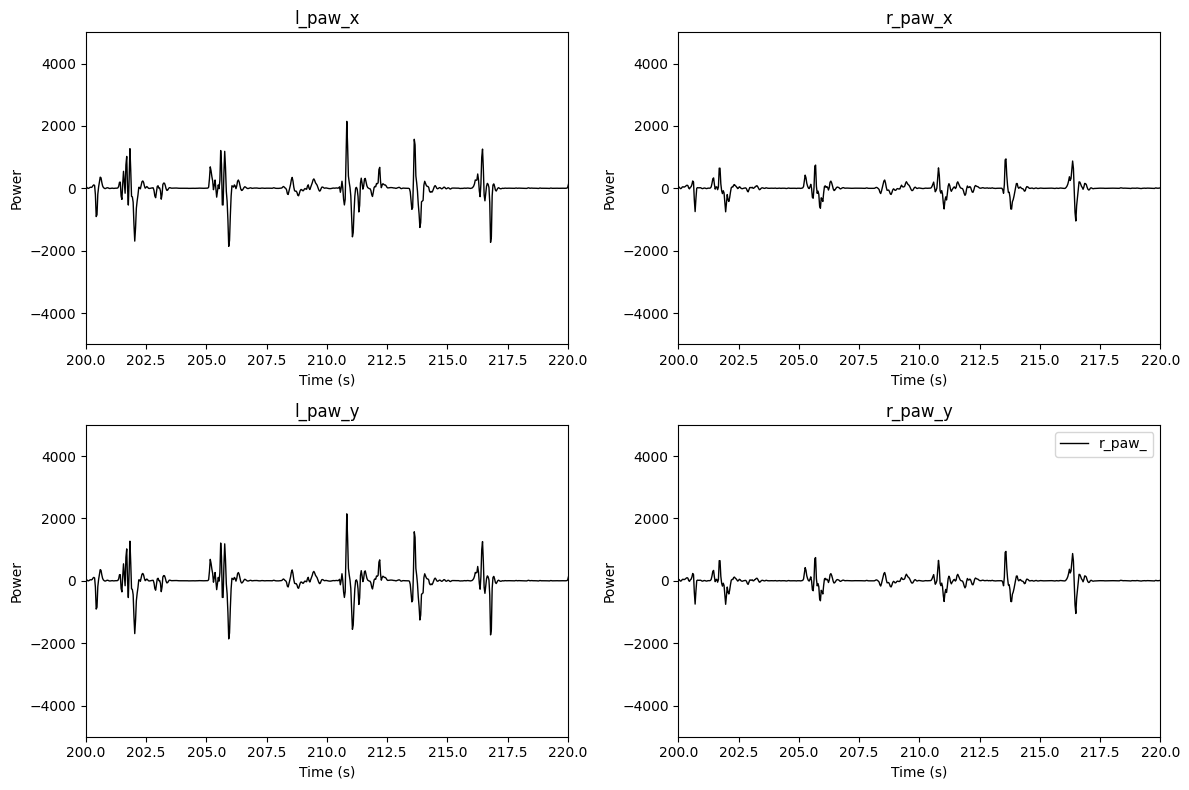

In [33]:
init = 200
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
for v, var in enumerate(['l_paw_', 'r_paw_']):
    for c, coor in enumerate(['x', 'y']):
        # ax[c, v].plot(design_matrix['Bin'], stats.zscore(design_matrix[var+coor], nan_policy='omit'), label=var, color='k')
        # if var == 'l_paw_':
        #     ax[c, v].plot(design_matrix['Bin'], stats.zscore(left_speeds[1], nan_policy='omit'), label=var, color='k', linewidth=1)
        # elif var == 'r_paw_':
        #     ax[c, v].plot(design_matrix['Bin'], stats.zscore(right_speeds[1], nan_policy='omit'), label=var, color='k', linewidth=1)
        # ax[c, v].plot(design_matrix['Bin'], stats.zscore(design_matrix[var+coor], nan_policy='omit'), label=var, color='k')
        if var == 'l_paw_':
            ax[c, v].plot(design_matrix['Bin'], left_speeds[1], label=var, color='k', linewidth=1)
        elif var == 'r_paw_':
            ax[c, v].plot(design_matrix['Bin'], right_speeds[1], label=var, color='k', linewidth=1)
        # Wavelet transforms
        # for i, frequency in enumerate(f):
        #     # ax[c, v].plot(design_matrix['Bin'], stats.zscore(design_matrix[var+coor+str(frequency)], 
        #     #                                                  nan_policy='omit')+2, label=str(frequency), linewidth=.8)
        #     ax[c, v].plot(design_matrix['Bin'], design_matrix[var+coor+str(frequency)]+2, label=str(frequency), linewidth=.8)
        ax[c, v].set_xlim([init, init+20])
        ax[c, v].set_ylim([-5000, 5000])
        ax[c, v].set_ylabel('Power')
        ax[c, v].set_xlabel('Time (s)')
        ax[c, v].set_title(var+coor)
    ax[1, 1].legend()
    plt.tight_layout()